# Reducing Traveler Turnover 

How can a company decrease turnover? Turnover costs us not only in lost experience, but added training and onboarding costs as each new team member is brought up to speed.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
attrition= pd.read_csv('Employee_Attrition.csv')
attrition.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
#Describe Job Satisfaction of each travel group
attrition['JobSatisfaction'].groupby(attrition['BusinessTravel']).describe()

,count,mean,std,min,25%,50%,75%,max
BusinessTravel,,,,,,,,
Non-Travel,150.0,2.793333,1.031690,1.0,2.0,3.0,4.0,4.0
Travel_Frequently,277.0,2.790614,1.099828,1.0,2.0,3.0,4.0,4.0
Travel_Rarely,1043.0,2.702780,1.113459,1.0,2.0,3.0,4.0,4.0


In [4]:
#Separate groups into active and inactive employees
already_left= attrition[attrition['Attrition'] == 'Yes']
employees= attrition[attrition['Attrition'] == 'No']
print('Average job satisfaction of those who quit:', already_left['JobSatisfaction'].mean())
print('Average job satisfaction of those who stayed:', employees['JobSatisfaction'].mean())

Average job satisfaction of those who quit: 2.4683544303797467
Average job satisfaction of those who stayed: 2.778588807785888


In [5]:
#Establish counts and travel ratios
travel_counts= employees['BusinessTravel'].value_counts()
travel_counts_quitters= already_left['BusinessTravel'].value_counts()
print('Frequent travel ratio of employees:', travel_counts['Travel_Frequently']/travel_counts.sum())
print('Frequent travel ratio of quitters:', travel_counts_quitters['Travel_Frequently']/travel_counts_quitters.sum())
print('Non-travel ratio of employees:', travel_counts['Non-Travel']/travel_counts.sum())
print('Non-travel ratio of quitters:', travel_counts_quitters['Non-Travel']/travel_counts_quitters.sum())

Frequent travel ratio of employees: 0.16869424168694241
Frequent travel ratio of quitters: 0.2911392405063291
Non-travel ratio of employees: 0.11192214111922141
Non-travel ratio of quitters: 0.05063291139240506


In [6]:
print('Total Attrition Rate:', len(attrition[attrition['Attrition'] == 'Yes']) / len(attrition))
f_traveler_attrition= attrition[attrition['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts()
print('Attrition rate among frequent travelers:', f_traveler_attrition[1]/f_traveler_attrition.sum())
r_traveler_attrition= attrition[attrition['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts()
print('Attrition rate among rare travelers:', r_traveler_attrition[1]/r_traveler_attrition.sum())
n_traveler_attrition= attrition[attrition['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts()
print('Attrition rate among non-travelers:', n_traveler_attrition[1]/n_traveler_attrition.sum())

Total Attrition Rate: 0.16122448979591836
Attrition rate among frequent travelers: 0.2490974729241877
Attrition rate among rare travelers: 0.14956855225311602
Attrition rate among non-travelers: 0.08


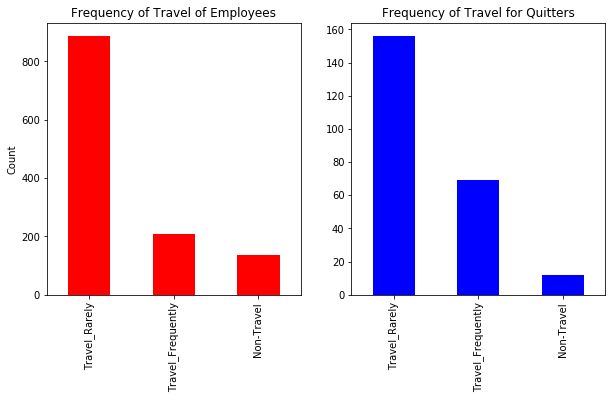

In [7]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
plt.ylabel('Count')
plt.title('Frequency of Travel of Employees')
travel_counts.plot(kind='bar', color= 'red')

plt.subplot(1, 2, 2)
plt.title('Frequency of Travel for Quitters')
travel_counts_quitters.plot(kind='bar', color= 'blue')
plt.show()

From this data, we can conclude that employees who traveled frequently on business were about 50% more likely to quit, and non-traveling employees were about twice as likely to stay. Given the high attrition rates, the frequent traveler group is the most important group to target in lowering group attrition rates. 


__Hypothesis:__
Providing frequent travelers with ‘work from home’ days will decrease employee attrition rates. 


__Design:__
Reward half of frequent travelers a work from home, or remote day, twice per month, and do not provide any remote days for the other half. The key variable is attrition rate. Job satisfaction is a secondary variable. This is an A/B manipulation where remote days are given or not given. 

We will calculate the attrition rate of frequent travelers for the last six months and compare it to the attrition rate of remote day groups and no remote day groups for six months during the study. Each month we will conduct a survey with the remote and no remote groups to inquire about job satisfaction, measured on a 1 to 4 scale. By scanning the employee email archive for active membership, we can accurately track which employees have left the company and which have stayed from both groups. 

When six months have passed, we will conduct a t-test comparing the mean attrition rate of the remote group to the mean of the no remote group to determine what effects the treatment has had on employee attrition. 

If attrition decreases by 8% in comparison to the previous attrition rate, conclude that providing remote days is effective and provide remote days to all frequent travelers. If attrition rate decreases, but by less than one standard deviation, continue study for three more months. If attrition rate increases, conclude that providing remote days is ineffective and remove program. 


